30


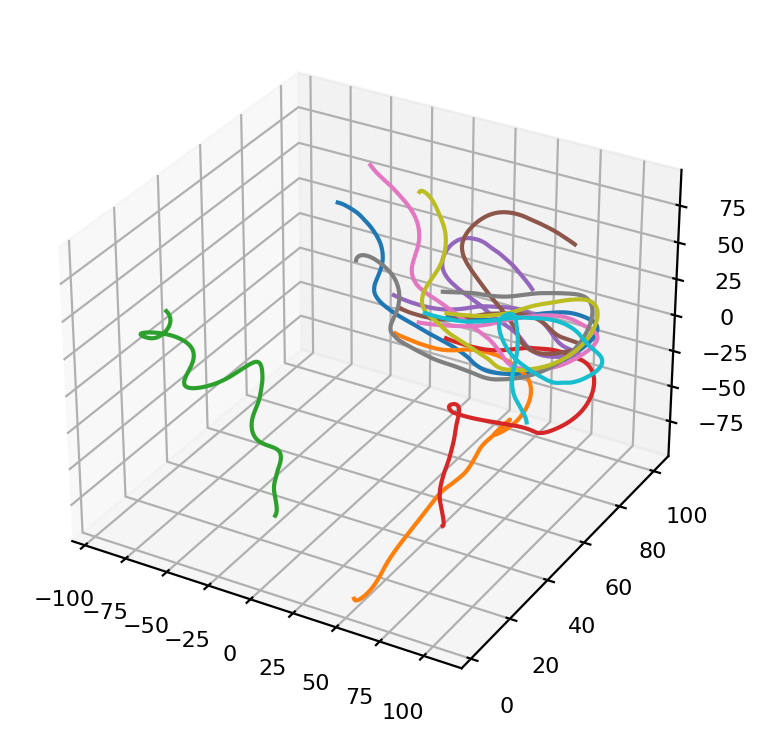

In [31]:
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

number_of_boids = 10

paths = []

for i in range(number_of_boids):
    paths.append([])
    paths.append([])
    paths.append([])

print(len(paths))

with open("data/10_boids_10_seconds.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        for path_index in range(number_of_boids * 3):
            #print(row[path_index])
            f_value = float(row[path_index])
            paths[path_index].append(f_value)
        
#display(paths)

fig = plt.figure(figsize=((10,4.5)))
ax = fig.add_subplot(projection='3d')

#plt.rcParams["font.family"] = "CMU Serif"
#plt.rcParams['font.size'] = 8



for path_index in range(number_of_boids):
    ax.plot(paths[(path_index * 3)],paths[(path_index * 3)+1],paths[(path_index * 3)+2])


plt.savefig("data/10_boids_10_seconds.svg")

plt.show()



150


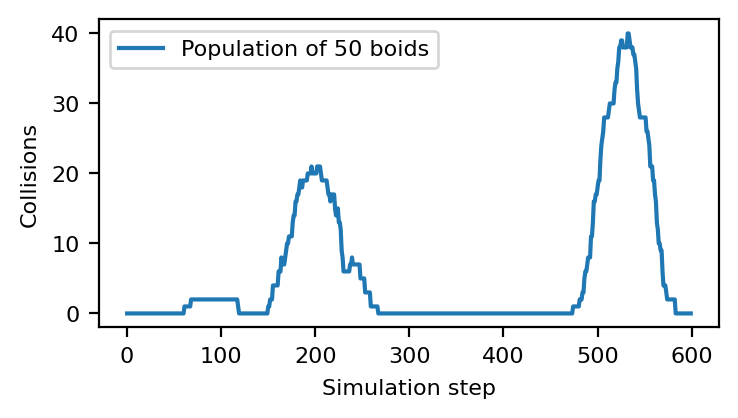

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

number_of_boids = 50

paths = []

for i in range(number_of_boids):
    paths.append([])
    paths.append([])
    paths.append([])

print(len(paths))

with open("data/50_boid_empty.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        for path_index in range(number_of_boids * 3):
            #print(row[path_index])
            f_value = float(row[path_index])
            paths[path_index].append(f_value)
        
# world 200x200x50 empty 100x100x50

collisions = [0] * 600
step_ids = []
for step in range(600):
    step_ids.append(step)

for path_index in range(number_of_boids):
    for step in range(600):
        x = paths[(path_index * 3)][step]
        y = paths[(path_index * 3)+1][step]
        z = paths[(path_index * 3)+2][step]
        if x < -50 or x > 50:
            collisions[step] += 1
        elif y < 0 or y > 50:
            collisions[step] += 1
        elif z < -50 or z > 50:
            collisions[step] += 1

plt.figure(figsize=(4, 2))
plt.plot(step_ids, collisions)
plt.legend(["Population of 50 boids"])
plt.xlabel("Simulation step")
plt.ylabel("Collisions")

plt.savefig("data/collisions.svg")

plt.show()
